In [1]:
import numpy as np
from numpy.random import randn
from numpy.linalg import norm, pinv

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
plt.rcParams['font.size'] = 18

In [2]:
L, n = 8, 200
x = np.linspace(0, L, n)

# Parabola
f = x**2
n_train, n_test = n // 2, n - (n // 2)
x_train, x_test = x[:n_train], x[n_train:] # [0, 4], [4, 8]
f_train, f_test = f[:n_train], f[n_train:]

# number of model terms
M = 30
nsamples = 100
E_ni = np.empty((nsamples, M))
E_ne = np.empty((nsamples, M))

for order in range(M):
    # interpolation key
    Φ_i = x_train[:, np.newaxis] ** np.arange(order)
    # extrapolation key
    Φ_e = x_test[:, np.newaxis] ** np.arange(order)

    for sample in range(nsamples):
        f_ni = x_train**2 + 0.1*randn(n_train) # interpolation
        f_ne = x_test**2 + 0.1*randn(n_test) # extrapolation
        
        a_ni = pinv(Φ_i) @ f_ni
        f_nai = Φ_i @ a_ni
        E_ni[sample, order] = norm(f_train - f_nai) / norm(f_train)
        
        f_nae = Φ_e @ a_ni # use loadings from x in [0, 4]
        E_ne[sample, order] = norm(f_test - f_nae) / norm(f_test)

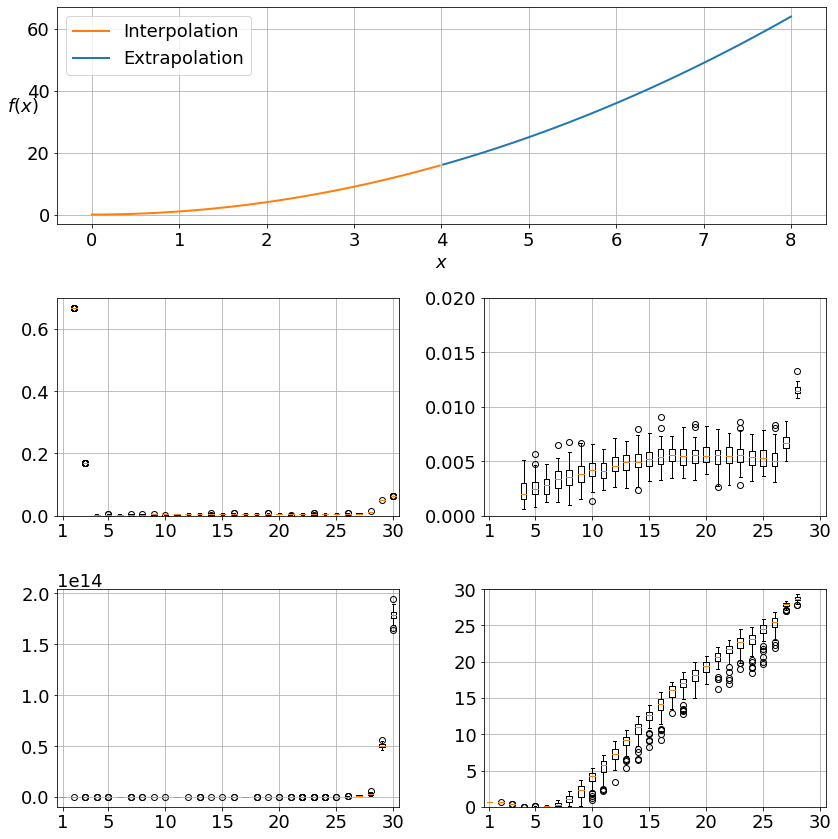

In [3]:
fig = plt.figure(tight_layout=True, figsize=(12, 12))
gs = plt.GridSpec(3, 2)
axs = [
    fig.add_subplot(gs[0, :]),
    fig.add_subplot(gs[1, 0]),
    fig.add_subplot(gs[1, 1]),
    fig.add_subplot(gs[2, 0]),
    fig.add_subplot(gs[2, 1])
]

axs[0].plot(x_train, f_train, color='C1', linewidth=2, label='Interpolation')
axs[0].plot(x_test, f_test, color='C0', linewidth=2, label='Extrapolation')
axs[0].grid(True)
axs[0].legend()
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$f(x)$', rotation=0)

axs[1].boxplot(E_ni)
axs[1].set_ylim(0, 0.7)
axs[2].boxplot(E_ni)
axs[2].set_ylim(0, 0.02)
axs[3].boxplot(E_ne)
axs[4].boxplot(np.log(E_ne + 1))
axs[4].set_ylim(0, 30)

ticks = [1, 5, 10, 15, 20, 25, 30]
for ax in axs[1:]:
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks)
    ax.grid(True)